## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = 'data/plant-seedlings-classification/'

In [21]:
ls {PATH}

labels.csv  models/  sample_submission.csv  script.py  test/  tmp/  train/


In [22]:
f_model = resnext50

In [23]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [24]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train', label_csv, tfms=tfms,
                    suffix='', val_idxs=val_idxs, test_name='test')

In [25]:
data = get_data(256)

In [26]:
x,y = next(iter(data.val_dl))

In [27]:
y


    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
       ...          ⋱          ...       
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     0
[torch.cuda.FloatTensor of size 64x19 (GPU 0)]

In [28]:
list(zip(data.classes, y[0]))

[('Black-grass', 0.0),
 ('Charlock', 0.0),
 ('Chickweed', 0.0),
 ('Cleavers', 0.0),
 ('Common', 0.0),
 ('Cranesbill', 0.0),
 ('Fat', 0.0),
 ('Hen', 0.0),
 ('Loose', 0.0),
 ('Maize', 1.0),
 ('Mayweed', 0.0),
 ('Purse', 0.0),
 ('Scentless', 0.0),
 ('Shepherds', 0.0),
 ('Silky-bent', 0.0),
 ('Small-flowered', 0.0),
 ('Sugar', 0.0),
 ('beet', 0.0),
 ('wheat', 0.0)]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


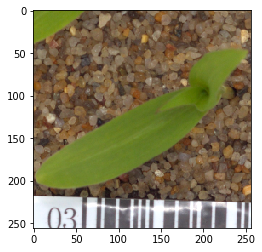

In [29]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [30]:
sz=64

In [31]:
data = get_data(sz)

In [32]:
data = data.resize(int(sz*1.3), 'tmp')

epoch      trn_loss   val_loss   f2                        
    0      0.657635   1.205213   0.219865  



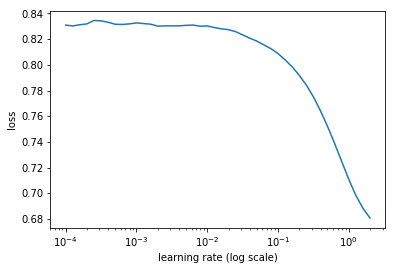

In [33]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)
lrf=learn.lr_find()
learn.sched.plot()

In [36]:
lr = 0.1
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                        
    0      0.445255   0.296072   0.531144  
    1      0.300912   0.21961    0.510311                  
    2      0.252365   0.211944   0.535766                  
    3      0.230691   0.199798   0.585457                  
    4      0.218454   0.190906   0.621064                  
    5      0.209215   0.185654   0.634877                  
    6      0.20187    0.185319   0.634927                  



[array([0.18532]), 0.6349274847959058]

In [40]:
lrs = np.array([lr/9,lr/3,lr])

In [41]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                        
    0      0.1797     0.127438   0.791654  
    1      0.12196    0.068225   0.901101                  
    2      0.086386   0.063349   0.913067                   
    3      0.07176    0.055997   0.91787                    
    4      0.054916   0.046819   0.934149                   
    5      0.045067   0.041446   0.940135                   
    6      0.039075   0.038487   0.947639                   



[array([0.03849]), 0.9476389838231942]

In [42]:
learn.save(f'{sz}')

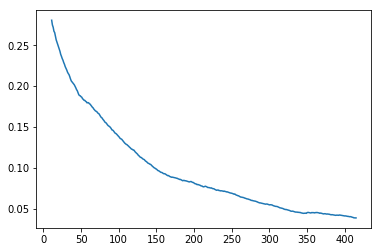

In [43]:
learn.sched.plot_loss()

In [44]:
sz=128

In [45]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                         
    0      0.083825   0.069588   0.885562  
    1      0.074684   0.059963   0.909183                   
    2      0.066856   0.05861    0.908271                   
    3      0.061951   0.052713   0.918742                   
    4      0.058983   0.051833   0.925738                   
    5      0.055167   0.052046   0.920924                   
    6      0.052929   0.051968   0.92203                    



[array([0.05197]), 0.9220300459774144]

In [46]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2                         
    0      0.050677   0.032495   0.952693  
    1      0.03731    0.032201   0.948912                   
    2      0.027919   0.027181   0.95817                    
    3      0.027734   0.029381   0.958018                   
    4      0.023128   0.027615   0.961909                   
    5      0.018812   0.022458   0.969102                   
    6      0.015918   0.02416    0.965215                   



In [47]:
sz=256

In [48]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2                         
    0      0.041476   0.03607    0.944811  
    1      0.034699   0.03235    0.947197                   
    2      0.031618   0.032013   0.949538                   
    3      0.029742   0.030157   0.952109                   
    4      0.027608   0.028941   0.955958                   
    5      0.025554   0.028514   0.954265                   
    6      0.02624    0.028678   0.956584                   



[array([0.02868]), 0.9565840738209158]

In [49]:
# learn.unfreeze()
# learn.fit(0.01, 1, cycle_len=1, cycle_mult=1)
# learn.save(f'{sz}')

In [50]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [51]:
f2(preds,y)

0.9622291743344376

### End

In [52]:
learn.save(f'{sz}')

In [133]:
log_preds_test = learn.predict(is_test=True)
log_preds_test.shape

(794, 19)

In [134]:
log_preds_test = np.argmax(log_preds_test,axis=1)
preds_classes = [data.classes[i].replace('_',' ') for i in log_preds_test]
probs = np.exp(log_preds_test)

In [139]:
import os
import pandas as pd
sub = pd.DataFrame({'file' : os.listdir(f'{PATH}test'),'species': preds_classes})
sub.to_csv('data/plant-seedlings-classification/submission.csv',index=False)